In [1]:
def fun(x,y,a1,b1):#画图的地方也要改
    z=x**2*a1+y**2*b1
    return z

In [2]:
#电场强度求解,单位mm
def Ex(x,y,z):
    Ex=Q*(x/(x**2+y**2+(z-d)**2)**1.5)-(x/(x**2+y**2+(z+d)**2)**1.5)
    return Ex
def Ey(x,y,z):
    Ey=Q*(y/(x**2+y**2+(z-d)**2)**1.5)-(y/(x**2+y**2+(z+d)**2)**1.5)
    return Ey
def Ez(x,y,z):
    Ez=Q*((z-d)/(x**2+y**2+(z-d)**2)**1.5)-((z+d)/(x**2+y**2+(z+d)**2)**1.5)
    return Ez

In [3]:
def a(x,y,z):#采用微元法的思想模拟粒子的运动，每运动一小段，看作匀加速运动
    ax=Ex(x,y,z)*q/m
    ay=Ey(x,y,z)*q/m
    az=Ez(x,y,z)*q/m
    return ax,ay,az

In [4]:
def v(ax,ay,az,vx0,vy0,vz0):
    vx=vx0+ax*t
    vy=vy0+ay*t
    vz=vz0+az*t
    return vx,vy,vz

In [5]:
def r(vx,vy,vz,ax,ay,az,rx0,ry0,rz0):
    rx=vx*t+1/2*ax*t**2+rx0
    ry=vy*t+1/2*ay*t**2+ry0
    rz=vz*t+1/2*az*t**2+rz0
    return rx,ry,rz

In [6]:
def one(x,y,z,vx0,vy0,vz0):
    ax,ay,az=a(x,y,z)
    vx1,vy1,vz1=v(ax,ay,az,vx0,vy0,vz0)
    rx,ry,rz=r(vx1,vy1,vz1,ax,ay,az,x,y,z)
    return vx1,vy1,vz1,rx,ry,rz
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec
def randomstart(n,r):
    rx0=(np.random.random((n,1))-0.5)*r*2
    ry0=(np.random.random((n,1))-0.5)*r*2
    rz0=(np.random.random((n,1))-0.5)*r*2
    rx0=np.array(rx0).flatten()
    ry0=np.array(ry0).flatten()
    rz0=np.array(rz0).flatten()+d
    return rx0,ry0,rz0

In [7]:
def Solve(n,r):
    rx1,ry1,rz1=randomstart(n,r)
    for i in range(0,n):
        rx0=rx1[i]
        ry0=ry1[i]
        rz0=rz1[i]
        vx0=0
        vy0=0
        vz0=0
        #print(i,rx0,ry0,rz0)#这个看算到多少个粒子了，看它不顺眼就注释掉
        while 1>0:
            vx0,vy0,vz0,rx0,ry0,rz0=one(rx0,ry0,rz0,vx0,vy0,vz0)
            if 0.8*d<=rz0<0.9*d or 0.01<=np.abs(rx0)<20 or 0.01<=np.abs(ry0)<0.02:
                t=0.00001
            if 0.7*d<=rz0<0.8*d or 0.02<=np.abs(rx0)<0.03 or 0.02<=np.abs(ry0)<0.03:
                t=0.001
            if 0.6*d<=rz0<0.7*d or 0.03<=np.abs(rx0)<0.04 or 0.03<=np.abs(ry0)<0.04:
                t=0.01
            if rz0<0.6*d or 0.04<=np.abs(rx0) or 0.04<=np.abs(ry0):
                t=0.1
            if vz0<-3*10**(8):
                break
            if rz0>d+0.3:
                break
            if rx0>planewidth/2 or rx0<-planewidth/2:
                break
            if ry0>planewidth/2 or ry0<-planewidth/2:
                break
            if rz0<=fun(rx0,ry0,a1,b1):
                if rx0>planewidth/2 or rx0<-planewidth/2:
                    break
                elif ry0>planewidth/2 or ry0<-planewidth/2:
                    break
                else:
                    #if vz0<-10000:#筛掉过大的异常点
                       # break
                    rx.append(rx0)
                    ry.append(ry0)
                    rz.append(rz0)
                    vx.append(vx0)
                    vy.append(vy0)
                    vlast.append(vz0)
                    break

In [8]:
def matplotlib1():
    fig=plt.figure(figsize=(4,4),dpi=100)
    x_major_locator=MultipleLocator(50)
    y_major_locator=MultipleLocator(50)
    ax=plt.gca()
    #ax为两条坐标轴的实例
    ax.xaxis.set_major_locator(x_major_locator)
    #把x轴的主刻度设置为50的倍数
    ax.yaxis.set_major_locator(y_major_locator)
    #把y轴的主刻度设置为50的倍数
    plt.xlim(-planewidth/2,planewidth/2)
    plt.ylim(-planewidth/2,planewidth/2)
    plt.scatter(rx,ry,color='r')
    x=[-planewidth/2,-planewidth/2,planewidth/2,planewidth/2,-planewidth/2]
    y=[-planewidth/2,planewidth/2,planewidth/2,-planewidth/2,-planewidth/2]
    plt.plot(x,y,color='g')
    plt.title("模拟粒子撞击板的分布情况")
    return fig

In [9]:
def matplot2():
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(4,4),dpi=80)
    ax = fig.gca(projection='3d')

    # 二元函数定义域平面集
    x = np.linspace(start=-planewidth/2,stop=planewidth/2, num=100)
    y = np.linspace(start=-planewidth/2,stop=planewidth/2,num=100)
    X, Y = np.meshgrid(x, y)    # 网格数据
    Z = np.power(X, 2)*a1 + np.power(Y, 2)*b1    # 二元函数 z = x**2 + y**2

    surf = ax.plot_surface(X=X,Y=Y,Z=Z,rstride=3,cstride=3,color='b',linewidth=0.5,alpha=0.1)

    ax.view_init(elev=40,azim=30)
    z=[]
    for i in range(0,len(rx)):
        z0=np.power(rx[i], 2)*a1 + np.power(ry[i], 2)*b1
        z.append(z0)
    #ax.scatter(0,0,d,s=30,color='g')
    ax.scatter(rx,ry,z,s=5,color='r',marker='*')
    ax.grid()
    plt.title("模拟粒子撞击板的分布情况")
    return fig

In [10]:
def matplot3():
    fig=plt.figure(dpi=100)
    n=len(vlast)
    x=range(0,n)
    plt.scatter(x,vlast)
    plt.title("速度分布")
    return fig


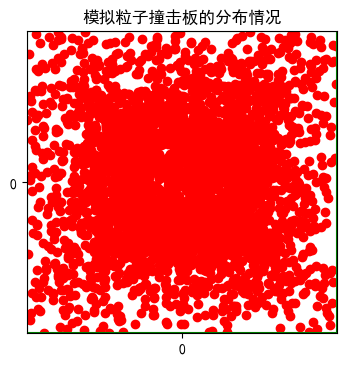

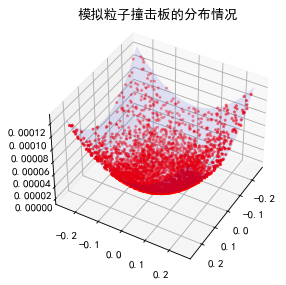

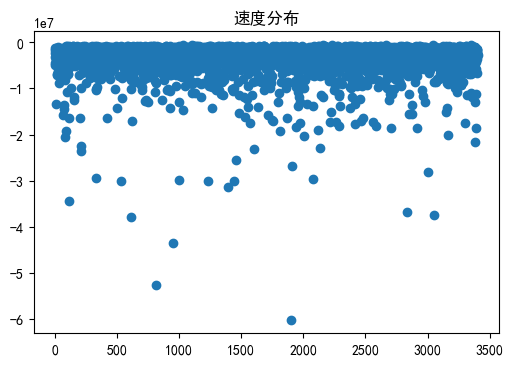

In [11]:

'''
DATE:2022.3.31
Author:张斯然
Target:模拟点高压源电离产生离子，在点——平板模型下，离子的运动状态
'''
import tkinter as tk
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示汉字
vx0=0
vy0=0
vz0=0
t=0.00000001
vx=[]
vy=[]
vz=[]
rx=[]
ry=[]
rz=[]
vlast=[]
root_window=tk.Tk()
root_window.title('点—平板曲面类粒子运动仿真')
root_window.geometry('1500x1500')
root_window["background"] = "white"
text=tk.Label(root_window,text="点—平板曲面类粒子运动仿真",bg="white",fg="black",font=('Times', 20))
text.grid(row=0,column=2)
labe1 = tk.Label(root_window,text="模拟粒子的质量(10**-26kg)：",bg="white",fg="black")
labe2 = tk.Label(root_window,text="模拟粒子的电荷量(10**-19 C)：",bg="white",fg="black")
labe3 = tk.Label(root_window,text="点类高压源的电势（V）：",bg="white",fg="black")
labe4 = tk.Label(root_window,text="板的宽度（m）：",bg="white",fg="black")
labe5 = tk.Label(root_window,text="模拟粒子数（个）：",bg="white",fg="black")
labe6 = tk.Label(root_window,text="点电荷源距离面中心的距离d（m）：",bg="white",fg="black")
labe7 = tk.Label(root_window,text="点电荷源半径(m)：",bg="white",fg="black")
labe8 = tk.Label(root_window,text="产生粒子的半径(m)：",bg="white",fg="black")
text1=tk.Label(root_window,text="请设置双曲面参数，若为平面则为0",bg="white",fg="black",font=('Times', 15))
text1.grid(row=9,column=0)
labe9 = tk.Label(root_window,text="X平方系数：",bg="white",fg="black")
labe10 = tk.Label(root_window,text="Y平方系数：",bg="white",fg="black")
labe1.grid(row=1)
labe2.grid(row=2)
labe3.grid(row=3)
labe4.grid(row=4)
labe5.grid(row=5)
labe6.grid(row=6)
labe7.grid(row=7)
labe8.grid(row=8)
labe9.grid(row=10)
labe10.grid(row=11)
type1=tk.DoubleVar()
type2=tk.DoubleVar()
type3=tk.DoubleVar()
type4=tk.DoubleVar()
type5=tk.IntVar()
type6=tk.DoubleVar()
type7=tk.DoubleVar()
type8=tk.DoubleVar()
type9=tk.DoubleVar()
type10=tk.DoubleVar()
entry1 = tk.Entry(root_window,textvariable=type1)
entry2 = tk.Entry(root_window,textvariable=type2)
entry3 = tk.Entry(root_window,textvariable=type3)
entry4 = tk.Entry(root_window,textvariable=type4)
entry5 = tk.Entry(root_window,textvariable=type5)
entry6 = tk.Entry(root_window,textvariable=type6)
entry7 = tk.Entry(root_window,textvariable=type7)
entry8 = tk.Entry(root_window,textvariable=type8)
entry9 = tk.Entry(root_window,textvariable=type9)
entry10 = tk.Entry(root_window,textvariable=type10)
entry1.grid(row=1, column=1)
entry2.grid(row=2, column=1)
entry3.grid(row=3, column=1)
entry4.grid(row=4, column=1)
entry5.grid(row=5, column=1)
entry6.grid(row=6, column=1)
entry7.grid(row=7, column=1)
entry8.grid(row=8, column=1)
entry9.grid(row=10, column=1)
entry10.grid(row=11, column=1)
def show():
    global m,q,V,planewidth,n,d,R,rou,a1,b1,Q
    m=float(entry1.get())*10**(-26)
    q=float(entry2.get())*10**(-19)
    V=float(entry3.get())
    planewidth=float(entry4.get())
    n=int(entry5.get())
    d=float(entry6.get())
    R=float(entry7.get())
    rou=float(entry8.get())
    Q=V*R
    a1=float(entry9.get())
    b1=float(entry10.get())
    #print(m,q,V,planewidth,n,d,R,rou,a,b)
    #global m,q,V,planewidth,n,d,R,rou,a,b
    return m,q,V,planewidth,n,d,R,rou,a1,b1
def Solve1():
    m,q,V,planewidth,n,d,R,rou,a,b=show()
    Solve(n,rou)
    figure=matplotlib1()
    root_window.canvas=FigureCanvasTkAgg(figure,root_window)
    root_window.canvas.draw()  #以前的版本使用show()方法，matplotlib 2.2之后不再推荐show（）用draw代替，但是用show不会报错，会显示警告
    root_window.canvas.get_tk_widget().grid(row=13,column=0)
    figure1=matplot2()
    root_window.canvas=FigureCanvasTkAgg(figure1,root_window)
    root_window.canvas.draw()  #以前的版本使用show()方法，matplotlib 2.2之后不再推荐show（）用draw代替，但是用show不会报错，会显示警告
    root_window.canvas.get_tk_widget().grid(row=13,column=2)
    figure1=matplot3()
    root_window.canvas=FigureCanvasTkAgg(figure1,root_window)
    root_window.canvas.draw()  #以前的版本使用show()方法，matplotlib 2.2之后不再推荐show（）用draw代替，但是用show不会报错，会显示警告
    root_window.canvas.get_tk_widget().grid(row=13,column=3)
    output=tk.Label(root_window,text="  仿真结果",bg="white",fg="black",font=('Times', 15))
    output.grid(row=3,column=3)
    output1=tk.Label(root_window,text="落在板上的粒子数为{}".format(len(vlast)),bg="white",fg="black",font=('Times', 15))
    output1.grid(row=4,column=3)
    output2=tk.Label(root_window,text="z方向平均速度为{}m/s".format(sum(vlast)/len(vlast)),bg="white",fg="black",font=('Times', 15))
    output2.grid(row=5,column=3)
    output3=tk.Label(root_window,text="z方向最大速度为{}m/s".format(min(vlast)),bg="white",fg="black",font=('Times', 15))
    output3.grid(row=6,column=3)
    output4=tk.Label(root_window,text="z方向最小速度为{}m/s".format(max(vlast)),bg="white",fg="black",font=('Times', 15))
    output4.grid(row=7,column=3)
    sum1=0
    for i in vlast:
        f=m*i**2
        sum1=sum1+f
    F=2*1.2*10**11/n*planewidth**2*sum1
    output5=tk.Label(root_window,text="粒子风产生推力为为{}N".format(F),bg="white",fg="black",font=('Times', 15))
    output5.grid(row=8,column=3)
    
                     
tk.Button(root_window,text='确定',width=10,command=show).grid(row=12,column=0,sticky=tk.W,padx=10,pady=5)
tk.Button(root_window,text='开始仿真',width=10,command=Solve1).grid(row=12,column=1,sticky=tk.W,padx=10,pady=5)
root_window.mainloop()#开启主循环，让窗口处于显示状态